<Body>   
   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the result in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 20** in your corresponding practical class. Upload the files until 23:59 of **May 31, 2024**.


---



# **Identification**

* **Group:** A02_B
* **Name:** Diogo Araújo Oliveira
* **Student Number:** 202007968

* **Name:** Tiago Marques Claro
* **Student Number:** 202006003


---




**Initial setup:** To download the data files, run the next cell.

In [2]:
#!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
#!unzip data-setMLproject2.zip -d.


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [3]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


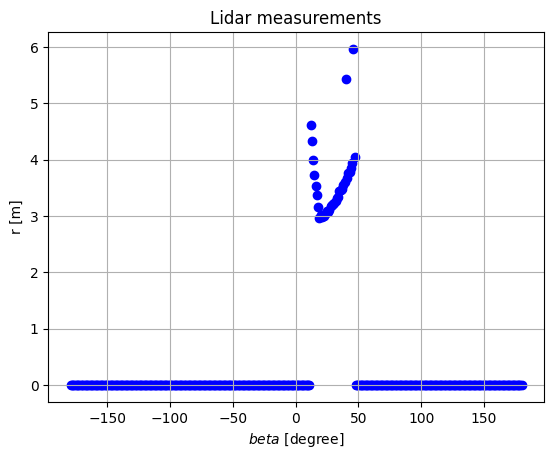

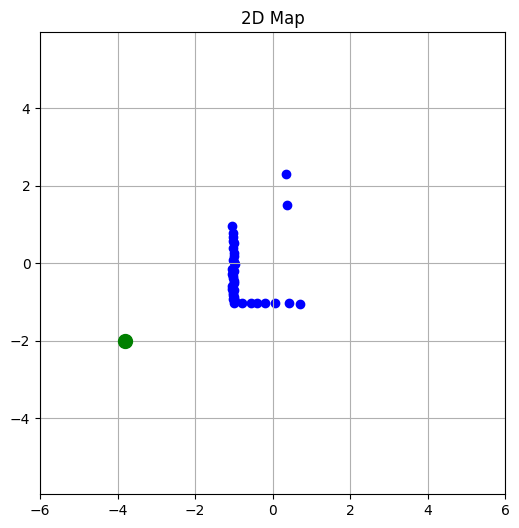

In [4]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


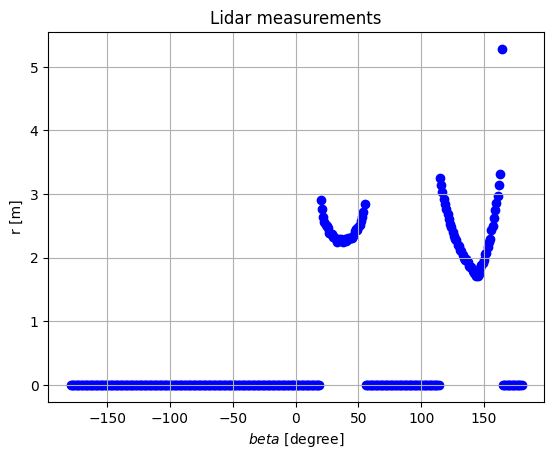

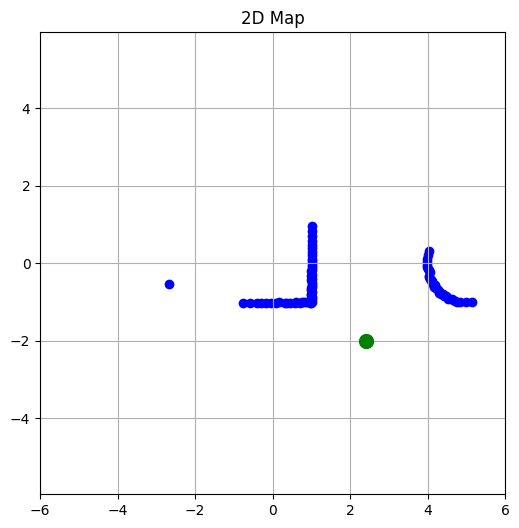

In [5]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [6]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [7]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the result of notebook #7).

In [8]:
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# KNN

def vector2norm(x, data):
	npoints = data.shape[0]
	distances = np.zeros(npoints)
	
	for i in range(npoints) :
		distances[i] = np.linalg.norm(x-data[i], 2)
	return distances


def kNN_classifier(k,x,data):
	npoints = data.shape[0]
	# compute distance to training points
	dist = vector2norm(x,data[:,:-1])
	# sort along increasing distances
	ind = np.argsort(dist,axis=0)
	classes = data[:,360]
	classes_sorted = classes[ind]

	# determine class with more element in the k neighborhood
	c1 = 0
	c2 = 0
	for i in range(k):
		if classes_sorted[i]==1:
			c1 +=1
		else:
			c2 +=1
	if c1>c2:
		return 1
	else:
		return 2


**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.


In [9]:
# To complete

# Let's check for all trainning data

data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)


for k in [1,3,5,7,9]:
	classification = []
	classification_train = []

	for t in range(len(X_train)):
		classification.append(kNN_classifier(k, X_train[t], data_train))

	classification_train = np.array(classification)

	# Let's check for the testing data

	X_test = df_test.iloc[:, np.arange(2,362,1)].values
	Y_test = df_test["label"].values

	classification_test = []
	classification = []

	for t in range(len(X_test)):

		classification.append(kNN_classifier(k, X_test[t], data_train))
		#print(f"Sample {t} classified as {classification[t]} should be {Y_test[t]}")

	classification_test.append(classification)

	classification_train = np.array(classification_train)
	classification_test = np.array(classification_test)

	# Get the accuracy

	acc_train = np.sum(classification_train == Y_train)/len(Y_train)
	acc_test = np.sum(classification_test == Y_test)/len(Y_test)

	# printing the result

	print(f"Accuracy of the train model with k = {k}: {100.0*acc_train:4.2f}%")
	print(f"Accuracy of the test model with k = {k}: {100.0*acc_test:4.2f}%")


Accuracy of the train model with k = 1: 100.00%
Accuracy of the test model with k = 1: 100.00%
Accuracy of the train model with k = 3: 99.87%
Accuracy of the test model with k = 3: 99.48%
Accuracy of the train model with k = 5: 99.64%
Accuracy of the test model with k = 5: 99.27%
Accuracy of the train model with k = 7: 99.82%
Accuracy of the test model with k = 7: 99.69%
Accuracy of the train model with k = 9: 99.78%
Accuracy of the test model with k = 9: 99.58%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function;

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better result with non constant learning rate. A final loss below 0.05 is good!


In [10]:
# To complete

import numpy as np
np.random.seed(42)

N_INPUTS = 10  #Number of inputs

def mse_loss(y_true, y_pred):
	return ((y_true - y_pred) ** 2).mean()

def sigmoid(x):
	return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
	fx = sigmoid(x)
	return fx * (1 - fx)

# ReLu activation function:
def relu(x):
	return np.maximum(0, x)

# Derivative of ReLu
def deriv_relu(x):
	return np.where(x <= 0, 0, 1)

class NeuralNetwork:
	'''
	Structure of the neural network:
		- N_INPUTS inputs
		- a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
		- an output layer with 1 neuron (o1)
	'''
	def __init__(self):
		# Biases
		self.b1 = np.random.random()
		self.b2 = np.random.random()
		self.b3 = np.random.random()
		self.b4 = np.random.random()
		self.b5 = np.random.random()
		self.bo = np.random.random()

		# # Weights
		self.w1o, self.w2o, self.w3o, self.w4o, self.w5o = np.random.random(5)
		self.wi1 = np.random.random(N_INPUTS)
		self.wi2 = np.random.random(N_INPUTS)
		self.wi3 = np.random.random(N_INPUTS)
		self.wi4 = np.random.random(N_INPUTS)
		self.wi5 = np.random.random(N_INPUTS)
		


	def feedforward(self, x):
		'''
		- x is a numpy array with N_INPUTS elements.
		'''
		# # Hidden layer
		self.sum_h1 = np.dot(self.wi1, x) + self.b1
		self.h1 = relu(self.sum_h1)
		self.sum_h2 = np.dot(self.wi2, x) + self.b2
		self.h2 = relu(self.sum_h2)
		self.sum_h3 = np.dot(self.wi3, x) + self.b3
		self.h3 = relu(self.sum_h3)
		self.sum_h4 = np.dot(self.wi4, x) + self.b4
		self.h4 = relu(self.sum_h4)
		self.sum_h5 = np.dot(self.wi5, x) + self.b5
		self.h5 = relu(self.sum_h5)

		# # Output layer
		self.sum_o1 = self.w1o*self.h1 + self.w2o*self.h2 + self.w3o*self.h3 + self.w4o*self.h4 + self.w5o*self.h5 + self.bo
		self.o1 = sigmoid(self.sum_o1)
		return self.o1


	def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
		'''
		- data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
		- y_trues is a numpy array with n elements.
		Elements in y_true correspond to those in data.
		'''
		loss_prev = 10000  #loss_prev is the loss of the previous iteration
		for epoch in range(epochs):
			for x, y_true in zip(data, y_trues):

				# *************************************************
				# 1. Feedforward Step
				y_pred = self.feedforward(x)

				# *************************************************
				# 2. Backpropagation Step

				# Partial derivatives.
				d_L_d_ypred = -2 * (y_true - y_pred)

				# Output Layer:  Neurons
				d_ypred_d_w1o = self.h1 * deriv_sigmoid(self.sum_o1)
				d_ypred_d_w2o = self.h2 * deriv_sigmoid(self.sum_o1)
				d_ypred_d_w3o = self.h3 * deriv_sigmoid(self.sum_o1)
				d_ypred_d_w4o = self.h4 * deriv_sigmoid(self.sum_o1)
				d_ypred_d_w5o = self.h5 * deriv_sigmoid(self.sum_o1)

				d_ypred_d_bo = deriv_sigmoid(self.sum_o1)

				d_ypred_d_h1 = self.w1o * deriv_sigmoid(self.sum_o1)
				d_ypred_d_h2 = self.w2o * deriv_sigmoid(self.sum_o1)
				d_ypred_d_h3 = self.w3o * deriv_sigmoid(self.sum_o1)
				d_ypred_d_h4 = self.w4o * deriv_sigmoid(self.sum_o1)
				d_ypred_d_h5 = self.w5o * deriv_sigmoid(self.sum_o1)

				# Hidden Layer: Neuron h1
				d_h1_d_wi1 = x * deriv_relu(self.sum_h1)
				d_h1_d_b1 = deriv_relu(self.sum_h1)

				# Hidden Layer: Neuron h1
				d_h2_d_wi2 = x * deriv_relu(self.sum_h2)
				d_h2_d_b2 = deriv_relu(self.sum_h2)

				# Hidden Layer: Neuron h3
				d_h3_d_wi3 = x * deriv_relu(self.sum_h3)
				d_h3_d_b3 = deriv_relu(self.sum_h3)

				# Hidden Layer: Neuron h4
				d_h4_d_wi4 = x * deriv_relu(self.sum_h4)
				d_h4_d_b4 = deriv_relu(self.sum_h4)

				# Hidden Layer: Neuron h5
				d_h5_d_wi5 = x * deriv_relu(self.sum_h5)
				d_h5_d_b5 = deriv_relu(self.sum_h5)

				# *************************************************
				# 3. Gradient Descent
				# Output Layer:  Neuron o1
				self.w1o -= learn_rate * d_L_d_ypred * d_ypred_d_w1o
				self.w2o -= learn_rate * d_L_d_ypred * d_ypred_d_w2o
				self.w3o -= learn_rate * d_L_d_ypred * d_ypred_d_w3o
				self.w4o -= learn_rate * d_L_d_ypred * d_ypred_d_w4o
				self.w5o -= learn_rate * d_L_d_ypred * d_ypred_d_w5o
				self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

				# Hidden Layer: Neuron h1
				self.wi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_wi1
				self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

				# Hidden Layer: Neuron h2
				self.wi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_wi2
				self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

				# Hidden Layer: Neuron h3
				self.wi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_wi3
				self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_b3

				# Hidden Layer: Neuron h4
				self.wi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_wi4
				self.b4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_b4

				# Hidden Layer: Neuron h5
				self.wi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_wi5
				self.b5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_b5

			# *************************************************
			# 4. Performance assessment (per epoch)
			if epoch % 5 == 0:
				y_preds = np.apply_along_axis(self.feedforward, 1, data)
				loss = mse_loss(y_trues, y_preds)
				print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
			# Uncomment this part to enable a nonconstant learning rate
				if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
					if learn_rate > 0.002:
						learn_rate = learn_rate*.9  #decrease 90% of the previous value
					print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
				loss_prev = loss



# Create the ANN
model = NeuralNetwork()

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
	j=0
	for i in range(360):
		if X_train[t][i] > 0:
			if j < N_INPUTS:
				trainingset_X[t][j] = X_train[t][i]
				j +=1

# Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

#Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# Train the ANN
model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 1000)

Epoch 0  --> Loss: 0.4999
Epoch 5  --> Loss: 0.2116
Epoch 10  --> Loss: 0.1859
Epoch 15  --> Loss: 0.1925
I'm at epoch 15 with new learn_rate:  0.09000000000000001
Epoch 20  --> Loss: 0.1873
Epoch 25  --> Loss: 0.1733
Epoch 30  --> Loss: 0.1711
Epoch 35  --> Loss: 0.1866
I'm at epoch 35 with new learn_rate:  0.08100000000000002
Epoch 40  --> Loss: 0.1702
Epoch 45  --> Loss: 0.1711
I'm at epoch 45 with new learn_rate:  0.07290000000000002
Epoch 50  --> Loss: 0.1647
Epoch 55  --> Loss: 0.1650
I'm at epoch 55 with new learn_rate:  0.06561000000000002
Epoch 60  --> Loss: 0.1618
Epoch 65  --> Loss: 0.1599
Epoch 70  --> Loss: 0.1593
Epoch 75  --> Loss: 0.1579
Epoch 80  --> Loss: 0.1567
Epoch 85  --> Loss: 0.1558
Epoch 90  --> Loss: 0.1547
Epoch 95  --> Loss: 0.1536
Epoch 100  --> Loss: 0.1522
Epoch 105  --> Loss: 0.1510
Epoch 110  --> Loss: 0.1493
Epoch 115  --> Loss: 0.1477
Epoch 120  --> Loss: 0.1469
Epoch 125  --> Loss: 0.1450
Epoch 130  --> Loss: 0.1399
Epoch 135  --> Loss: 0.1391
Epoch 

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.

Answer: The k-NN is an algorithm that classifies the data based on the majority of the k-nearest neighbors. In this case the k-NN classifier showed better result (above 99% accuracy for k=1,3,5,7,9) than the ANN classifier (around 95% accuracy). The ANN classifier is a model that uses a neural network to classify the data. The execution time was similar for both classifiers. For this example the k-NN is more suitable, due to the high accuracy and the simplicity of the algorithm. But in a more complex scenario with a larger dataset, the ANN could be more suitable.

In [11]:
# To complete

#Evaluation with the Training set
classification = []
for t in range(len(Y_train)):
  	classification.append(model.feedforward(trainingset_X[t]))
classification = np.array(classification)
error_clas = 0
for t in range(len(classification)):
	if (classification[t] >= 0.5) and trainingset_Y[t] == 0:
		error_clas += 1
	if (classification[t] < 0.5) and trainingset_Y[t] == 1:
		error_clas += 1

print("Number of misclassified samples in the training data: ", error_clas, "in", len(Y_train))
acc = 1 - error_clas/len(Y_train)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")


# Evaluation with Test_set
test_set_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
	j=0
	for i in range(360):
		if X_test[t][i] > 0:
			if j < N_INPUTS:
				test_set_X[t][j] = X_test[t][i]
				j +=1

test_set_Y = Y_test-1

classification = []
for t in range(len(Y_test)):
  	classification.append(model.feedforward(test_set_X[t]))
classification = np.array(classification)
error_clas = 0
for t in range(len(classification)):
	if (classification[t] >= 0.5) and test_set_Y[t] == 0:
		error_clas += 1
	if (classification[t] < 0.5) and test_set_Y[t] == 1:
		error_clas += 1

print("Number of misclassified samples in the test data: ", error_clas, "in", len(Y_test))
acc = 1 - error_clas/len(Y_test)
print(f"Accuracy of the model: {100.0*acc:4.2f}%")


Number of misclassified samples in the training data:  96 in 2240
Accuracy of the model: 95.71%
Number of misclassified samples in the test data:  48 in 960
Accuracy of the model: 95.00%


# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for
1. $t=1\,s$ (which has only one object) and
2. for $t=32\,s$ (which has 2 objects).

What can you conclude? \\
Do not use sklearn or similar packages (use the results of notebook #10).


# ESCREVER AQUI

Number of iterations 2
Number of iterations 3


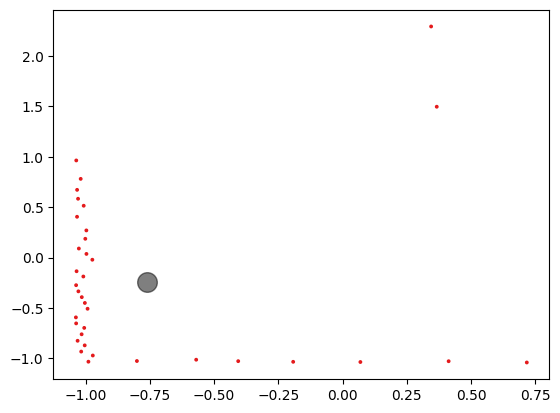

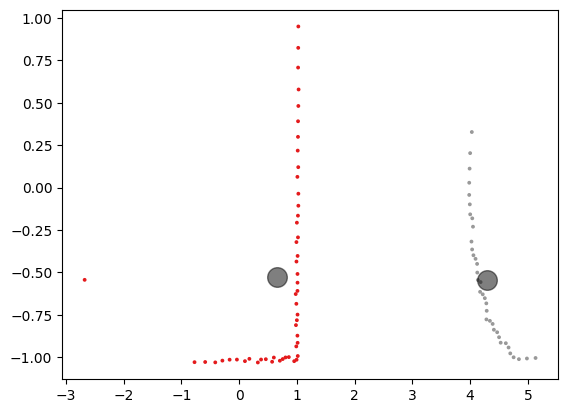

In [12]:
def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
	'''
		X_func are sample points; 
		K_func is the number of clusters;
		showplot 0/1 - not / show centroid evolution over iterations;
		ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
	'''
	cluster = np.zeros(X_func.shape[0],dtype=int)
	centr_ini = []

	if ini_method:

		for i in range(K_func):
			centr_ini.append(X_func[i])
	else:
		# Non absurd Random Initial Centroids
		max0 = max(X_func[:,0]);
		min0 = min(X_func[:,0]);
		max1 = max(X_func[:,1]);
		min1 = min(X_func[:,1]);

		for i in range(K_func):
			centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

	iter = 0
	diff = 1
	centroids = centr_ini
	centr_list = [centroids]

	while diff:

		for sample_i, sample_pt in enumerate(X_func):
			min_dist = float('inf')

			for centroid_i, centroid in enumerate(centroids):
				dist =  np.sqrt((centroid[0] - sample_pt[0])**2 + (centroid[1] - sample_pt[1])**2)
				if dist < min_dist:
					min_dist = dist
					cluster[sample_i] = centroid_i
		
		sum = np.zeros((K_func,2))
		count = np.zeros(K_func)

		for sample_i, sample_pt in enumerate(X_func):
			sum[cluster[sample_i]] += X_func[sample_i]
			count[cluster[sample_i]] += 1

		new_centroids = np.zeros((K_func,2))

		for k in range(K_func):
			if (count[k]>0):
				new_centroids[k] = sum[k] / count[k]
			else:
				new_centroids[k] = [random.uniform(min0,max0),random.uniform(min1,max1)] 

		if np.count_nonzero(centroids-new_centroids) == 0:
			diff = 0
		else:
			centroids = new_centroids
			centr_list.append(new_centroids)
		iter = iter+1
	
	print("Number of iterations", iter)
	#print(centr_list)

	if show_plot:
		cols = min(iter,6)
		fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
		for col in range(min(cols,iter)):
			ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c=np.zeros(X_func.shape[0]), cmap='Set2')
			i = round(iter/cols*col)
			if (col==cols-1):
				i = iter-1

			for j in range(K_func):
				centr_plot_x = centr_list[i][j][0]
				centr_plot_y = centr_list[i][j][1]
				ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=0.3, cmap='Set1')
				ax[col].title.set_text("it " + str(i) )
		plt.show()

	return centroids, cluster


x_o, y_o = [], []

t=1*10 
for i in range(len(Lidar_range[t])):
	if Lidar_range[t][i] > 0:
		x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
		y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 1, show_plot=0, ini_method=0)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
plt.scatter(centr[:, 0], centr[:, 1], c='black', s=200, alpha=0.5);

x_o, y_o = [], []

t=32*10 
for i in range(len(Lidar_range[t])):
	if Lidar_range[t][i] > 0:
		x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
		y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 2, show_plot=0, ini_method=0)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
plt.scatter(centr[:, 0], centr[:, 1], c='black', s=200, alpha=0.5);


**2.2**
Using the previous results,
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

Number of iterations 2
Number of iterations 9
Number of iterations 2
Number of iterations 2
Number of iterations 10
Number of iterations 2
Number of iterations 2
Number of iterations 11
Number of iterations 2
Number of iterations 2
Number of iterations 6
Number of iterations 2
Number of iterations 2
Number of iterations 5
Number of iterations 2
Number of iterations 2
Number of iterations 2
Number of iterations 2
Number of iterations 2
Number of iterations 10
Number of iterations 2
Number of iterations 2
Number of iterations 11
Number of iterations 2
Number of iterations 2
Number of iterations 12
Number of iterations 2
Number of iterations 2
Number of iterations 5
Number of iterations 2
Number of iterations 2
Number of iterations 3
Number of iterations 2
Number of iterations 2
Number of iterations 4
Number of iterations 2
Number of iterations 2
Number of iterations 8
Number of iterations 2
Number of iterations 2
Number of iterations 8
Number of iterations 2
Number of iterations 2
Number

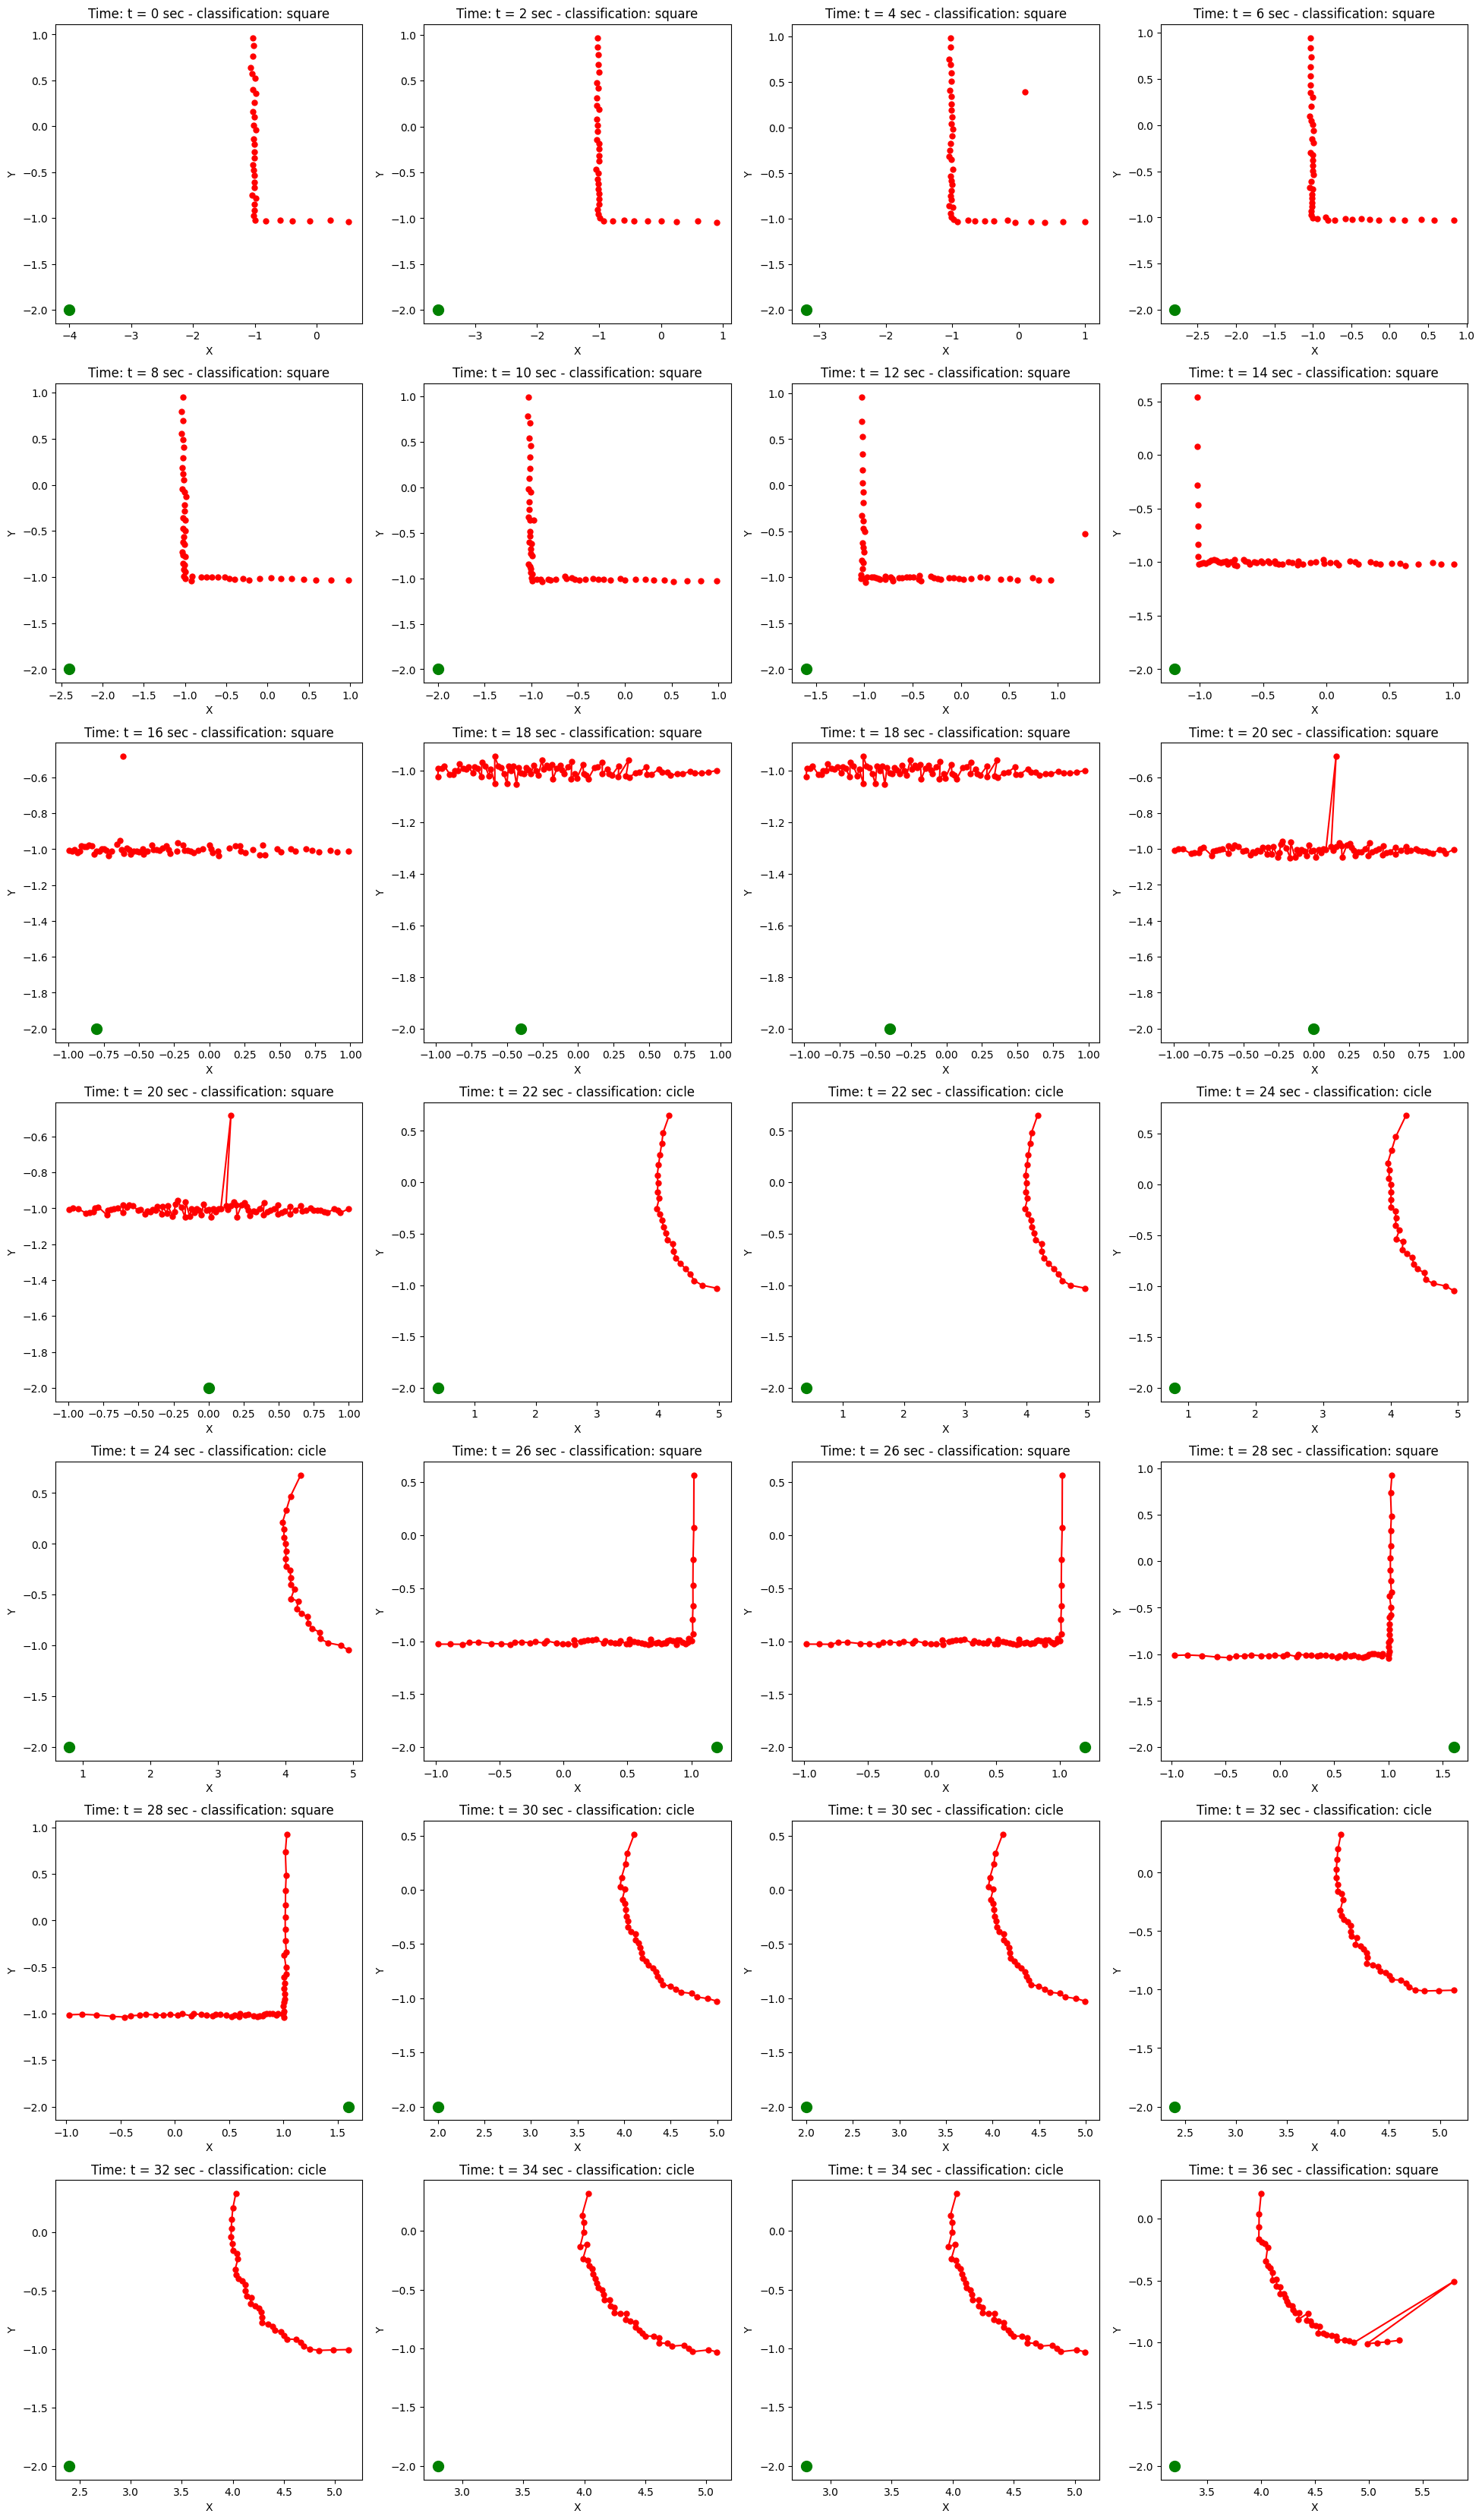

In [19]:
# To complete

# to decide if k=1 or k=2,
Threshold = 25

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

def SSE(X, centroids, cluster):
  '''
    returns the Sum of Squared Error
    X are the 2D points
    centroids are the cluster centers
    cluster is the cluster that each data point belongs to
  '''
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2)  ####
  return sum

# Building the data set for ANN testing using k-means to split objects

test_set_X = np.array([])
clust_time = []
clust_object = []

for t in range(len(px)):

	x_o, y_o = [], []
	x_o_1, y_o_1 = [], []
	x_o_2, y_o_2 = [], []

	for i in range(len(Lidar_range[t])):
		if Lidar_range[t][i] > 0:
			x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
			y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

	X = np.array([x_o, y_o]).T
	cost_list = []
	k_range = range(1, 3)
	for k in k_range:
		centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0)
		# Calculate SSE
		cost = SSE(X, centr, clust)
		cost_list.append(cost)
	#Let's now decide if this snapshot has 1 or 2 obstacles
	if abs(cost_list[0]-cost_list[1]) > Threshold:
		#2 objects

		centr, clust = kmeans_func(X, 2, show_plot=0, ini_method=0)

		X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
		j1,j2=0,0

		for i in range(len(x_o)):

			if clust[i] == 0:
				x_o_1.append(x_o[i])
				y_o_1.append(y_o[i])

			if clust[i] == 1:
				x_o_2.append(x_o[i])
				y_o_2.append(y_o[i])

			if j1 < N_INPUTS:
				if clust[i] == 0:
					X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
					j1=j1+1
			if j2 < N_INPUTS:
				if clust[i] == 1:
					X_feature2[j2]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
					j2=j2+1


		clust_time.append([t*0.1, px[t], py[t]])
		clust_time.append([t*0.1, px[t], py[t]])
		clust_object.append([x_o_1, y_o_1])
		clust_object.append([x_o_2, y_o_2])


		if len(test_set_X) == 0:
			test_set_X = np.array([X_feature1, X_feature2])
		else:
			test_set_X = np.concatenate((test_set_X,np.array([X_feature1, X_feature2])))

	else: #only one object

		centr, clust = kmeans_func(X, 1, show_plot=0, ini_method=0)

		X_feature1 = np.zeros([N_INPUTS])
		j1=0

		for i in range(len(x_o)):

			if clust[i] == 0:
				x_o_1.append(x_o[i])
				y_o_1.append(y_o[i])

			if j1 < N_INPUTS:
				if clust[i] == 0:
					X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
					j1=j1+1

		clust_time.append([t*0.1, px[t], py[t]])
		clust_object.append([[x_o_1], [y_o_1]])

		if len(test_set_X) == 0:
			test_set_X = np.array([X_feature1])
		else:
			test_set_X = np.concatenate((test_set_X,np.array([X_feature1])))

classification = []
times = []
result = []

for t in range(len(test_set_X)):
	class_value = model.feedforward(test_set_X[t])
	classification.append(class_value)
	times.append(clust_time[t][0])

	if class_value >= 0.5:
		result.append([clust_time[t][0], clust_time[t][1], [clust_time[t][2]], clust_object[t][0], clust_object[t][1], 2, "square"]) 

	if class_value < 0.5:
		result.append([clust_time[t][0], clust_time[t][1], [clust_time[t][2]], clust_object[t][0], clust_object[t][1], 1, "circle"])

times = np.array(times)
time_plot = np.arange(0, 60, 2)

num_cols = 4
num_rows = int(len(time_plot)/num_cols)

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6*num_cols, 6*num_rows))

r, c = 0, 0
counter = 0
t_index = 0

while(counter < num_cols*num_rows):
	time_index = np.where(time_plot[t_index] == times)
	size = len(time_index[0])

	t = time_index[0][0]

	ax[r][c].plot(result[t][1], result[t][2], 'g', marker=".", markersize=20)
	ax[r][c].plot(np.array(result[t][3]), np.array(result[t][4]), 'r', marker=".", markersize=10)
	ax[r][c].set_title(f"Time: t = {time_plot[t_index]} sec - classification: {result[t][6]}")
	ax[r][c].set_xlabel("X")
	ax[r][c].set_ylabel("Y")

	counter += 1

	if c == 3:
		r += 1
		c = 0
	else:
		c += 1

	if(counter >= num_cols*num_rows):
		break

	if(size == 2):
		time_index = time_index[0][1]

		ax[r][c].plot(result[t][1], result[t][2], 'g', marker=".", markersize=20)
		ax[r][c].plot(np.array(result[t][3]), np.array(result[t][4]), 'r', marker=".", markersize=10)
		ax[r][c].set_title(f"Time: t = {time_plot[t_index]} sec - classification: {result[t][6]}")
		ax[r][c].set_xlabel("X")
		ax[r][c].set_ylabel("Y")

		counter += 1

		if c == 3:
			r += 1
			c = 0
		else:
			c += 1

	t_index += 1
	

**2.3 (Extra)**
Using now PyTorch or other similar package, implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).